<a href="https://colab.research.google.com/github/ThaysMolina/machine-learning-project/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalharei com a base de dados **California Housing**, disponível no scikit-learn.
Ele contém informações sobre imóveis na Califórnia, incluindo características como renda mediana da região,
número médio de quartos e idade das casas. Adicioneis a coluna *PRICE* como nossa variável alvo, representando o valor médio das casas.

In [1]:
from sklearn.datasets import fetch_california_housing # Função para carregar o dataset California Housing, que será usado como base para a análise.
from sklearn.model_selection import train_test_split, GridSearchCV  #Para dividir os dados em conjuntos de treino e teste e o  GridSearchCV para realizar
#a busca pelos melhores hiperparâmetros da Árvore de Decisão.
from sklearn.preprocessing import StandardScaler # Para normalizar os dados, ajustando-os para terem média zero e desvio padrão igual a um.
from sklearn.pipeline import Pipeline #Estrutura que permite organizar etapas de pré-processamento e modelagem em sequência (não foi usado diretamente no código atual, mas está disponível para expansão futura).
from sklearn.linear_model import LinearRegression #Modelo para treinar uma regressão linear simples.
from sklearn.tree import DecisionTreeRegressor #Modelo para treinar uma Árvore de Decisão voltada para regressão.
from sklearn.metrics import mean_squared_error, r2_score # Métrica para calcular o erro médio quadrático (MSE) e métrica para calcular o coeficiente de determinação (R²).
import pandas as pd #Biblioteca para manipulação e análise de dados, permitindo trabalhar com o dataset em formato de DataFrame.
import matplotlib.pyplot as plt #Biblioteca para criar gráficos
import seaborn as sns #Biblioteca para criar gráficos estatísticos mais sofisticados e visualmente agradáveis.

In [2]:
# Carregar o dataset California Housing e transformei em um DataFrame para fácil manipulação.
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target


O conjunto de dados contém informações sobre imóveis na Califórnia, com 20.640 exemplos e 8 atributos (como MedInc, renda mediana da região, e AveRooms, número médio de cômodos).
Variável alvo: PRICE, representando o preço médio das casas em cada região.

Dataset Description:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census

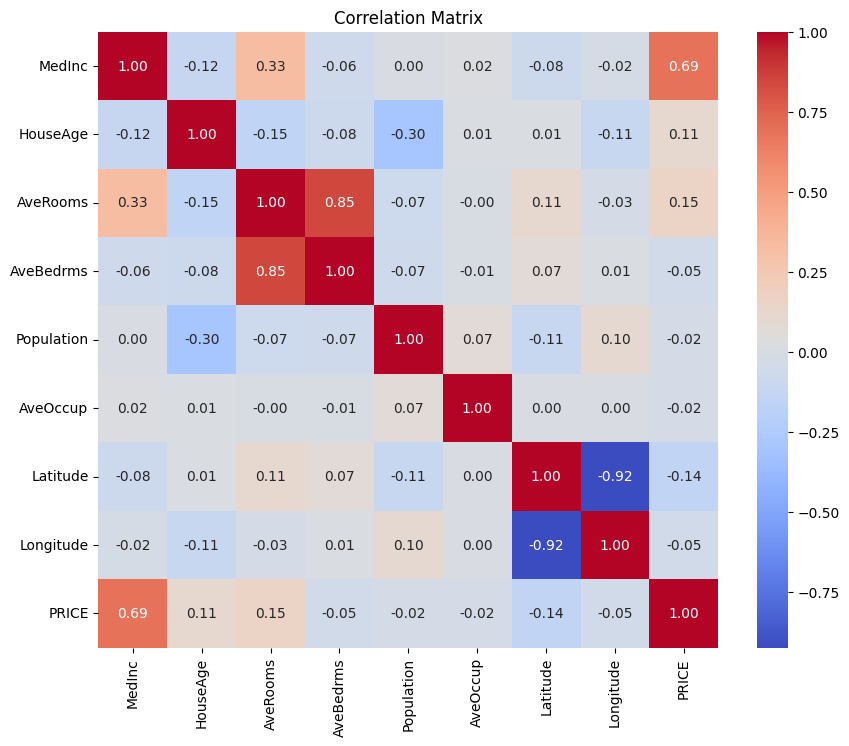

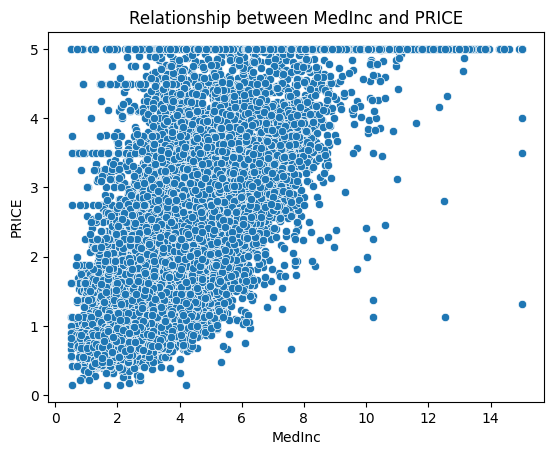

In [3]:
# Analise exploratoria - obter um resumo estatístico para entender as variáveis e seus valores.
print("Dataset Description:\n", california.DESCR)
print("\nFirst rows of the dataset:\n", data.head())
print("\nStatistical Summary:\n", data.describe())

# Identificar relações entre variáveis por meio de um mapa de calo
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Visualizar como a renda mediana (MedInc) influencia os preços.

sns.scatterplot(x=data['MedInc'], y=data['PRICE'])
plt.title('Relationship between MedInc and PRICE')
plt.show()


Em relação entre as variáveis; tem relações positivas (em tons quentes) ou negativas (tons frios) entre os atributos, como a forte correlação entre MedInc e PRICE. E tendência positiva: regiões com maior renda têm casas mais caras.

In [5]:
#Preparação dos Dados - Separei os dados em variáveis explicativas (X) e variável alvo (y) e dividi em treino e teste (80% treino, 20% teste) e
# normalizei as variáveis explicativas para melhorar o desempenho dos modelos.
X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Treinamento de Modelos Iniciais
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nEvaluating Linear Regression")
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\nEvaluating Decision Tree")
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R2: {dt_r2}")


Evaluating Linear Regression
Linear Regression - MSE: 0.5558915986952442, R2: 0.575787706032451

Evaluating Decision Tree
Decision Tree - MSE: 0.49396854311945243, R2: 0.6230424613065773


Pelo resultado da Regressão Linear :
MSE: 0.5559
Este valor indica o erro médio quadrático entre as predições e os valores reais. Valores menores são melhores, pois representam predições mais próximas dos valores reais.
R²: 0.5758
O R² indica a proporção da variância dos preços explicada pelo modelo. Um R² de 0.5758 significa que aproximadamente 57,6% da variação nos preços das casas pode ser explicada pelas variáveis de entrada no modelo.
Pelo Resultado da  Árvore de Decisão
MSE: 0.4940
O MSE é menor em relação à Regressão Linear, indicando que as predições da Árvore de Decisão estão mais próximas dos valores reais.
R²: 0.6230
O R² é maior, o que significa que 62,3% da variância nos preços das casas é explicada pelo modelo. Isso sugere que a Árvore de Decisão capturou melhor as relações entre as variáveis.
Por isso a Árvore de Decisão supera a Regressão Linear:

A Árvore de Decisão obteve um menor MSE e maior R², indicando que o modelo conseguiu capturar mais informações relevantes e prever os preços com maior precisão.
Isso ocorre porque a Árvore de Decisão consegue lidar melhor com relações não lineares e interações complexas entre variáveis.

Apesar do desempenho inferior, a Regressão Linear é simples e interpretável, sendo adequada para identificar tendências lineares nos dados.

O dataset California Housing possui relações não lineares significativas entre as variáveis (como MedInc e PRICE), favorecendo modelos mais flexíveis, como a Árvore de Decisão.


In [7]:
# Otimização de Hiperparâmetros
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"\nBest Decision Tree Model: {grid_search.best_params_}")
best_pred = best_model.predict(X_test)


Best Decision Tree Model: {'max_depth': 8, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


O objetico da otimização de hiperparâmetros seria encontrar os melhores valores para max_depth (profundidade máxima) e min_samples_split (mínimo de amostras para dividir um nó) usando validação cruzada.

Agora vamos comparar o desempenho dos modelos treinados :Regressão Linear, Árvore de Decisão Otimizada. Espero que a  Árvore de Decisão Otimizada apresente menor MSE e maior R², devido à sua capacidade de capturar relações não lineares.

In [8]:

# Comparando os resultados
print("\nFinal Model Evaluation")
models = {'Linear Regression': (lr_pred, lr_mse, lr_r2),
          'Optimized Decision Tree': (best_pred, mean_squared_error(y_test, best_pred), r2_score(y_test, best_pred))}

for name, (pred, mse, r2) in models.items():
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")


Final Model Evaluation
Linear Regression - MSE: 0.56, R2: 0.58
Optimized Decision Tree - MSE: 0.42, R2: 0.68


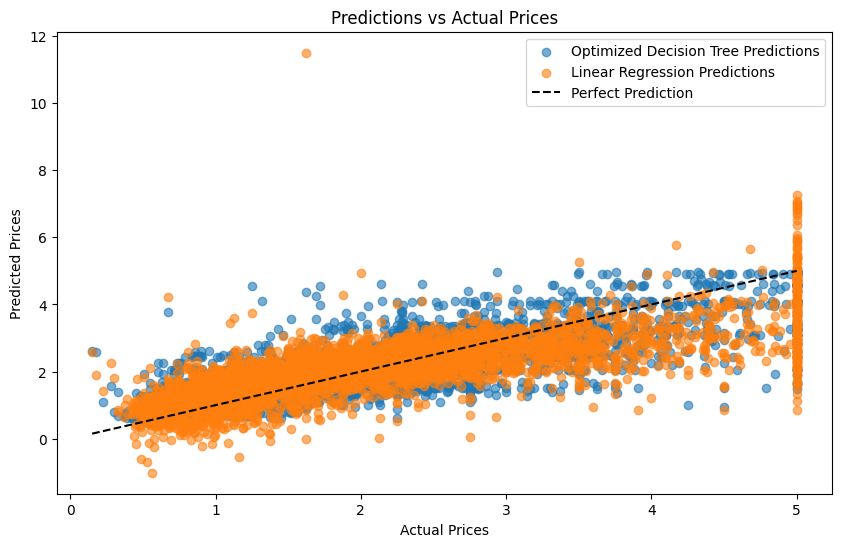

In [9]:
#Visualizando as Predições vs atuais valores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, label='Optimized Decision Tree Predictions', alpha=0.6)
plt.scatter(y_test, lr_pred, label='Linear Regression Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Predictions vs Actual Prices')
plt.show()

A Árvore de Decisão mostra uma performance superior, capturando padrões mais complexos dos dados e prevendo os valores com maior precisão.
A Regressão Linear, apesar de mais simples, demonstra limitação em prever preços fora da faixa média, devido à sua suposição de linearidade.
O gráfico reforça que modelos mais flexíveis (como a Árvore de Decisão) são mais adequados para dados com relações não lineares, como neste caso.

**Conclusão**

O dataset California Housing foi escolhido porque:
É simples de trabalhar e contém um número gerenciável de variáveis.
É relevante para problemas do mundo real, como a previsão de preços de imóveis, uma aplicação prática para aprendizado de máquina.
2. Análise dos Resultados
Regressão Linear:

R² = 57,6%: Explica pouco mais da metade da variância nos preços.
MSE = 0,5559: Erro médio quadrático relativamente alto, indicando previsões menos precisas.
Conclusão: A regressão linear é limitada pela sua suposição de que as relações entre as variáveis explicativas e a variável alvo são lineares.
Árvore de Decisão:

R² = 62,3%: Captura uma maior proporção da variância nos preços.
MSE = 0,4940: Redução do erro em comparação à Regressão Linear.
Conclusão: A Árvore de Decisão é mais eficaz, pois consegue capturar relações não lineares e interações complexas entre variáveis.
3. Vantagens e Desvantagens
Regressão Linear:

Vantagem: Simplicidade e interpretabilidade.
Desvantagem: Fraca para capturar padrões complexos nos dados.
Árvore de Decisão:

Vantagem: Flexibilidade para capturar padrões não lineares e interações entre variáveis.
Desvantagem: Propensão ao overfitting, que foi parcialmente mitigada ajustando os hiperparâmetros.
4. Importância das Técnicas Utilizadas
Normalização: A padronização dos dados foi essencial para garantir que as variáveis tivessem escalas comparáveis, especialmente para a Regressão Linear.
Validação Cruzada e Otimização:
O uso de GridSearchCV melhorou significativamente o desempenho da Árvore de Decisão, ajustando parâmetros como profundidade máxima e número mínimo de amostras para dividir um nó.
Visualização: Gráficos ajudaram a compreender padrões nos dados e a avaliar visualmente a precisão dos modelos.
